In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import random

DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

# Copies to final test
train_examples1 = train_examples
train_labels1 = train_labels
test_examples1 = test_examples
test_labels1 = test_labels


In [2]:
#print("train_examples shape", train_examples.shape)
#print("train_labels shape", train_labels.shape)
#print("test_examples shape", test_examples.shape)
#print("test_labels shape", test_labels.shape)

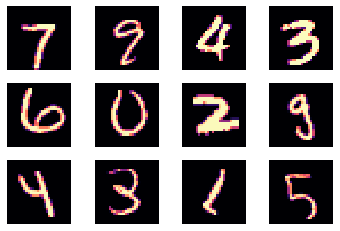

In [3]:
for i in range(12):
    sp = plt.subplot(3,4,i+1)
    sp.axis('Off')
    num = random.randint(0, len(train_examples))
    plt.imshow(train_examples[num], cmap='magma', interpolation='none')

In [4]:
# Before normalization

#train_examples[0][18]

In [5]:
# Normalizing digits

train_examples= train_examples.reshape(train_examples.shape[0], 28, 28, 1)
train_examples = train_examples.astype('float32')
train_examples/=255
test_examples = test_examples.reshape(test_examples.shape[0],28,28,1)
test_examples = test_examples.astype('float32')
test_examples/=255
#print(train_examples.shape)
#print(test_examples.shape)

In [6]:
# Before normalization

#train_examples[0][18]

In [7]:
from  keras.utils import np_utils

# Normalization labels

train_labels = np_utils.to_categorical(train_labels) # by default num_classes = 10
test_labels = np_utils.to_categorical(test_labels) # by default num_classes = 10
#print(train_labels[0])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
generator_images_train = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3,
                               #rescale=1./255, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
generator_images_test = ImageDataGenerator()

In [9]:
training_examples= generator_images_train.flow(train_examples, train_labels, batch_size=64)
test_examples= generator_images_test.flow(test_examples, test_labels, batch_size=64)

#print("training_examples shape", training_examples.shape)
#print("test_examples shape", test_examples.shape)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [11]:
from keras.layers import Conv2D, BatchNormalization

# Implementation based on this papaer: https://arxiv.org/pdf/1502.03167.pdf

img_input = layers.Input(shape=(28, 28, 1)) # 28 x 28 matrix and 1 for normalization

    # First convolution extracts 32 filters that are 3x3

# BatchNormalization according paper
BatchNormalization(axis=-1)
# 32 filters that are 3x3
x = layers.Conv2D(32, 3, activation='relu')(img_input)
# Max-pooling
x = layers.MaxPooling2D(2)(x)

    # Second convolution extracts 64 filters that are 3x3

# BatchNormalization according paper
BatchNormalization(axis=-1)
# 64 filters that are 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)

    # Third convolution extracts 64 filters that are 3x3

# BatchNormalization according paper
BatchNormalization(axis=-1)
# 64 filters that are 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
# Max-pooling
x = layers.MaxPooling2D(2)(x)

In [12]:
x = layers.Flatten()(x)

# BatchNormalization according paper
BatchNormalization()
x = layers.Dense(512, activation='relu')(x)

# BatchNormalization according paper
BatchNormalization()
# Other activations: activation='sigmoid'
output = layers.Dense(10, activation='softmax')(x)

model = Model(img_input, output)

In [ ]:
model.summary()

In [14]:
from tensorflow.keras.optimizers import RMSprop #este ultimo algort de aprendizaj

#Other optimizer: 'RMSprop(learning_rate=0.001)' 'Adagrad' 'tf.keras.optimizers.RMSprop(learning_rate=0.002)'
#Other loss: 'binary_crossentropy' 'tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)' 
#model.compile(optimizer=, 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [15]:
from keras.callbacks import EarlyStopping

# Searching the best

early_stop = EarlyStopping( monitor='val_acc', 
                            mode='max', 
                            patience=3)

In [16]:
history = model.fit(training_examples, 
                    validation_data = test_examples,
                    epochs = 10,
                    callbacks = [early_stop])

Epoch 1/10
938/938 [==============================] - 20s 18ms/step - loss: 0.2125 - acc: 0.9328 - val_loss: 0.0406 - val_acc: 0.9867
Epoch 2/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0702 - acc: 0.9784 - val_loss: 0.0359 - val_acc: 0.9880
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0501 - acc: 0.9847 - val_loss: 0.0265 - val_acc: 0.9907
Epoch 4/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0290 - val_acc: 0.9905
Epoch 5/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0355 - acc: 0.9892 - val_loss: 0.0243 - val_acc: 0.9924
Epoch 6/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0334 - acc: 0.9896 - val_loss: 0.0208 - val_acc: 0.9930
Epoch 7/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0293 - acc: 0.9908 - val_loss: 0.0236 - val_acc: 0.9921
Epoch 8/10
938/938 [==============================] - 17s 18ms

In [17]:
model.evaluate(test_examples)

157/157 [==============================] - 1s 3ms/step - loss: 0.0202 - acc: 0.9939


[0.020182404667139053, 0.9939000010490417]

|	9 	| 	2 	| 	3 	| 	0	|


|	2 	| 	4 	| 	7 	| 	2	|


|	4 	| 	6 	| 	9 	| 	9	|




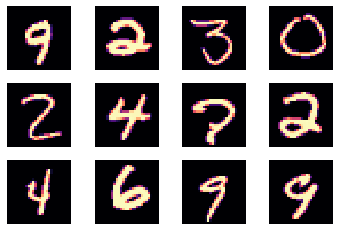

In [18]:
# TESTING
#predictions = model.predict(train_examples1)
predictions = model.predict(test_examples1)
answers = np.argmax(predictions,axis = 1) 

index_examples = []
for i in range(12):
    sp = plt.subplot(3,4,i+1)
    sp.axis('Off')
    num = random.randint(0, len(test_examples1))
    index_examples.append(num)
    plt.imshow(test_examples1[num], cmap='magma', interpolation='none')

for i in [0,4,8]:
  print(f"|\t{answers[index_examples[i]]} \t| \t{answers[index_examples[i+1]]} \t| \t{answers[index_examples[i+2]]} \t| \t{answers[index_examples[i+3]]}\t|\n\n")

Text(0.5, 1.0, 'Training and validation loss')

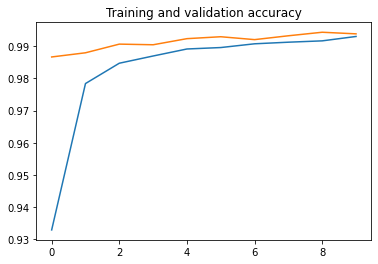

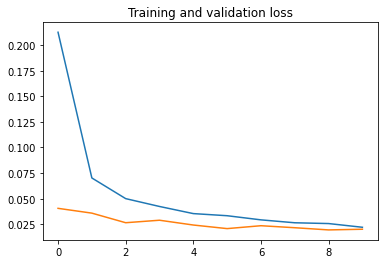

In [19]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)